# ***`DATASET 1 : SYNTHETIC DATA`***

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:10]

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(init="random",n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
#Lowest SSE value is suitable
kmeans.inertia_


74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [ ]:
#The number of iterations required to converge
kmeans.n_iter_

10

In [ ]:
kmeans.labels_[:10]

array([0, 1, 2, 2, 2, 2, 1, 2, 0, 2], dtype=int32)

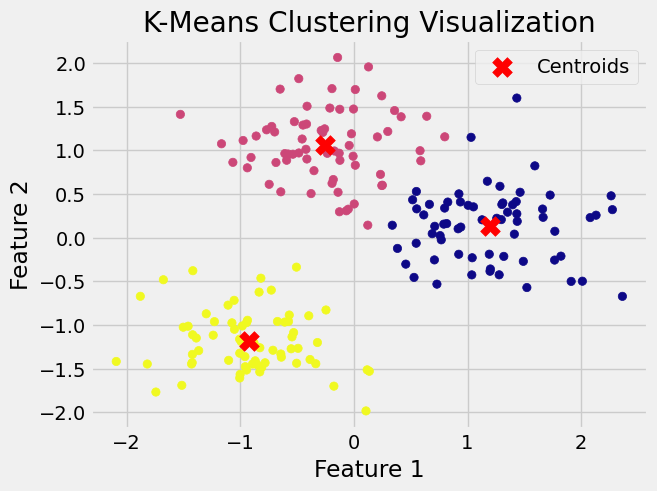

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=kmeans.labels_, cmap = 'plasma')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200, c = 'red', marker = 'X', label = 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

# ***`Elbow Method`***

In [ ]:
#Elbow Method
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

print(f"The lowest SSE value is : {min(sse):.3f}")


The lowest SSE value is : 28.200


In [ ]:
min_sse = min(sse)
min_k = sse.index(min_sse) + 1
print(f"The lowest SSE value is: {min_sse:.2f} for k = {min_k}")

The lowest SSE value is: 28.20 for k = 10


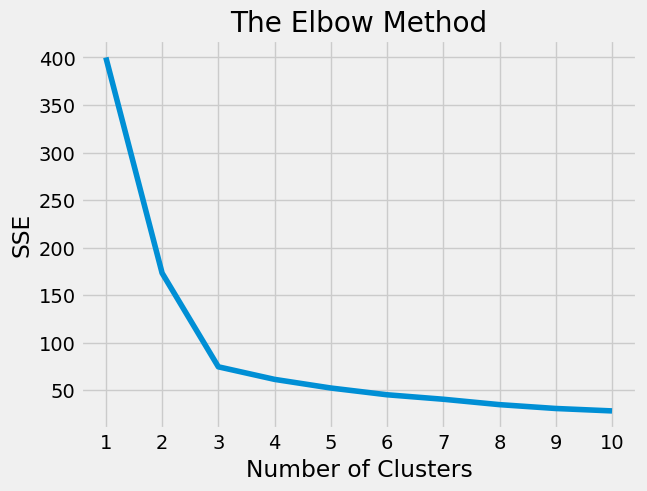

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("The Elbow Method")
plt.show()

# ***`silhouette coefficients`***

In [ ]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []
#Notice that we start at 2 clusters for silhouette coefiicient
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)
  print(f"For k = {k}, the silhouette coefficient is: {score:.2f}")

For k = 2, the silhouette coefficient is: 0.54
For k = 3, the silhouette coefficient is: 0.59
For k = 4, the silhouette coefficient is: 0.49
For k = 5, the silhouette coefficient is: 0.39
For k = 6, the silhouette coefficient is: 0.34
For k = 7, the silhouette coefficient is: 0.34
For k = 8, the silhouette coefficient is: 0.35
For k = 9, the silhouette coefficient is: 0.37
For k = 10, the silhouette coefficient is: 0.36


In [ ]:
max_silhouette_coefficient = max(silhouette_coefficients)
max_k = silhouette_coefficients.index(max_silhouette_coefficient) + 2 # We add 2 because we start from k = 2
print(f"The maximum silhouette coefficient is: {max_silhouette_coefficient:.3f} for k = {max_k}")

The maximum silhouette coefficient is: 0.592 for k = 3


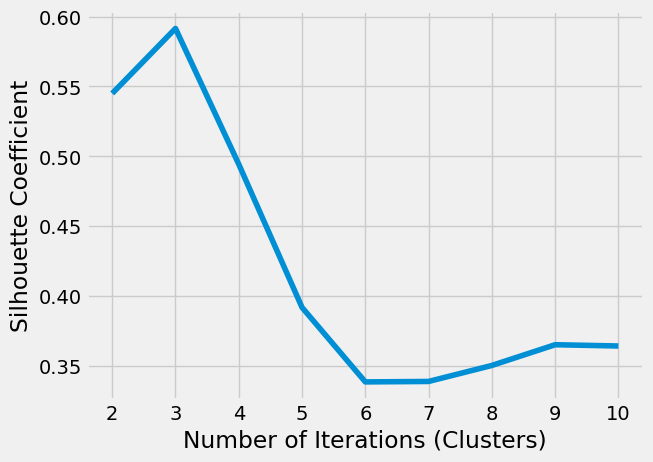

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Iterations (Clusters)")
plt.ylabel("Silhouette Coefficient")
plt.show()

# ***`davies_bouldin_score`***

In [ ]:
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"The Davies-Bouldin Index is: {db_index:.2f}")

The Davies-Bouldin Index is: 0.86


# ***`DATASET 2: KAGGLE LINK ->`***

# ***https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
print("\nFirst 5 Rows:")
print(data.head())


First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("Shape of Dataset:", data.shape)


Shape of Dataset: (200, 5)


In [ ]:
#Data Preprocessing
print("\nChecking for Missing Values:\n", data.isnull().sum())


Checking for Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Encode Gender column (Male=0, Female=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
# Selecting only numeric columns for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nSelected Features for Clustering:\n", features.head())


Selected Features for Clustering:
    Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [ ]:
#Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
#We Apply K-Means Clustering (initially with k=5)
kmeans = KMeans(
    n_clusters=10,
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, n_init=10, random_state=42)

In [ ]:
#Predicted Labels
print("\nPredicted Cluster Labels (first 100 points):")
print(kmeans.labels_[:100])


Predicted Cluster Labels (first 100 points):
[4 6 9 6 4 6 9 5 9 6 9 5 9 6 9 6 4 6 4 5 4 6 9 6 9 5 4 6 4 5 9 6 9 5 9 5 9
 6 4 6 4 5 4 7 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 8 7 7 8 8 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8]


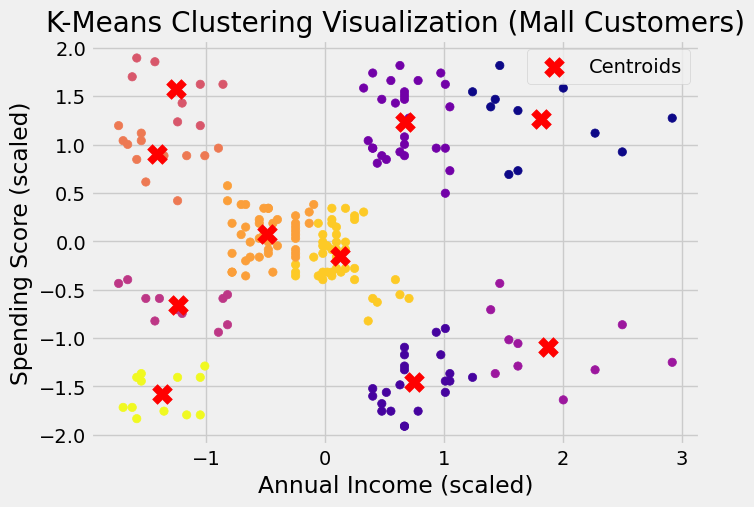

In [ ]:
#Cluster Visualization
plt.figure(figsize=(7,5))
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=kmeans.labels_, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clustering Visualization (Mall Customers)')
plt.legend()
plt.show()

# ***`Elbow Method`***

In [ ]:
#Elbow Method for Optimal k
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    sse.append(km.inertia_)

min_sse = min(sse)
min_k = sse.index(min_sse) + 1
print(f"\nThe lowest SSE value is: {min_sse:.2f} for k = {min_k}")


The lowest SSE value is: 30.08 for k = 10


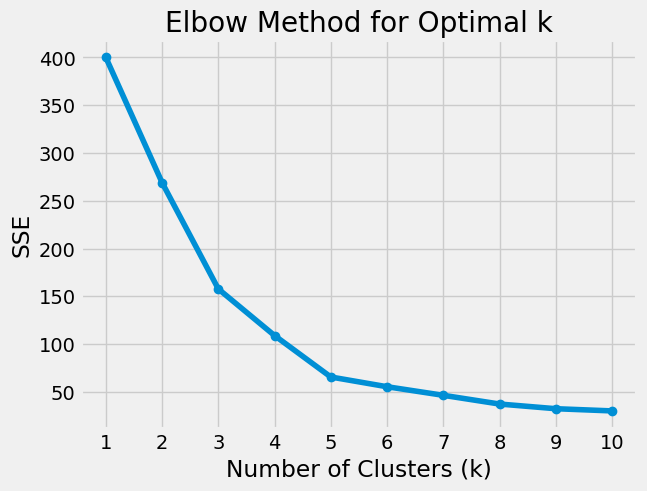

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

# ***`Silhouette Coefficient`***

In [ ]:
#Silhouette Coefficient for each k
silhouette_coefficients = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    score = silhouette_score(scaled_features, km.labels_)
    silhouette_coefficients.append(score)
    print(f"For k = {k}, Silhouette Coefficient = {score:.3f}")

max_silhouette = max(silhouette_coefficients)
best_k_sil = silhouette_coefficients.index(max_silhouette) + 2
print(f"\nMaximum Silhouette Coefficient = {max_silhouette:.3f} at k = {best_k_sil}")


For k = 2, Silhouette Coefficient = 0.295
For k = 3, Silhouette Coefficient = 0.467
For k = 4, Silhouette Coefficient = 0.494
For k = 5, Silhouette Coefficient = 0.555
For k = 6, Silhouette Coefficient = 0.538
For k = 7, Silhouette Coefficient = 0.531
For k = 8, Silhouette Coefficient = 0.456
For k = 9, Silhouette Coefficient = 0.458
For k = 10, Silhouette Coefficient = 0.441

Maximum Silhouette Coefficient = 0.555 at k = 5


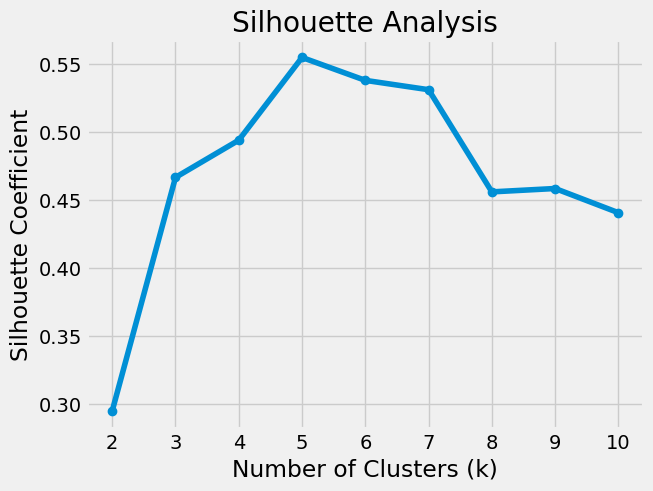

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Analysis")
plt.show()

# ***`Davies–Bouldin Index`***

In [ ]:
#Davies–Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"\nThe Davies–Bouldin Index is: {db_index:.3f}")


The Davies–Bouldin Index is: 0.818
